In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
data = pd.read_csv("/home/leong/Desktop/churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [131]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [132]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


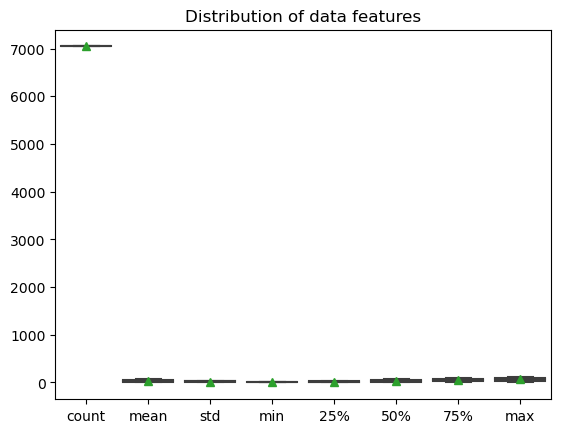

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

data_describe = data.describe()

# Create a boxplot for each numerical variable
sns.boxplot(data=data_describe.transpose(), showmeans=True)
plt.title("Distribution of data features")
plt.show()

Predict Churn

In [134]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [135]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [136]:
data = data.dropna()

In [137]:


#target variable
y = data['Churn']

#Extracting columns excluding non-numeric and target columns
X = data.drop(['Churn', 'customerID'], axis=1)

#Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

#Identify numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

#Create transformers for numerical and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')




In [138]:
#Create column transformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numerical_cols),('cat', categorical_transformer, categorical_cols)])

# Initialize models
models = {'Decision Tree': DecisionTreeClassifier(random_state=42),
          'Logistic Regression': LogisticRegression(random_state=42)
}


In [139]:

# Train and evaluate each model
for name, model in models.items():
    
    #pipeline with preprocessor and model
    clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier', model)])
    
    #split the data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Training the model
    clf.fit(X_train, y_train)

    #Making predictions on the testing set
    y_pred = clf.predict(X_test)
    
    #Evaluate the models
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    #Print results
    print(f'\n{name} Results:')
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{classification_rep}')


Decision Tree Results:
Accuracy: 0.7256574271499645
Confusion Matrix:
[[824 209]
 [177 197]]
Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.80      0.81      1033
         Yes       0.49      0.53      0.51       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407


Logistic Regression Results:
Accuracy: 0.7874911158493249
Confusion Matrix:
[[915 118]
 [181 193]]
Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1033
         Yes       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [140]:
# Make predictions on new data
new_data_predictions = clf.predict(X_test)

# Display the predictions
print("Predictions for the Decision Tree model:")
print(new_data_predictions)

# Display actual vs. predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': new_data_predictions})
print("\nActual vs. Predicted Values:")
print(results_df)

Predictions for the Decision Tree model:
['No' 'No' 'Yes' ... 'No' 'No' 'No']

Actual vs. Predicted Values:
     Actual Predicted
2481     No        No
6784     No        No
6125    Yes       Yes
3052     No        No
4099     No        No
...     ...       ...
1733     No        No
5250     No       Yes
5465     No        No
5851     No        No
3984     No        No

[1407 rows x 2 columns]


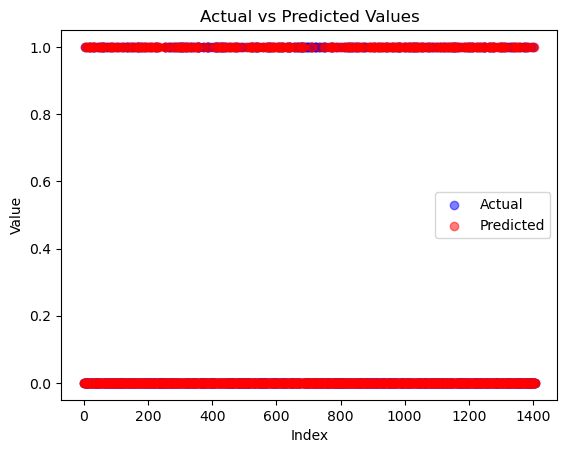

In [141]:

# Encode the data
encoded_results_df = results_df.replace({"Yes": 1, "No": 0})

# Extract actual and predicted values
actual_values = encoded_results_df['Actual']
predicted_values = encoded_results_df['Predicted']

# Plot actual vs predicted values
plt.scatter(range(len(actual_values)), actual_values, color='b', alpha=0.5, label='Actual')
plt.scatter(range(len(predicted_values)), predicted_values, color='r', alpha=0.5, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


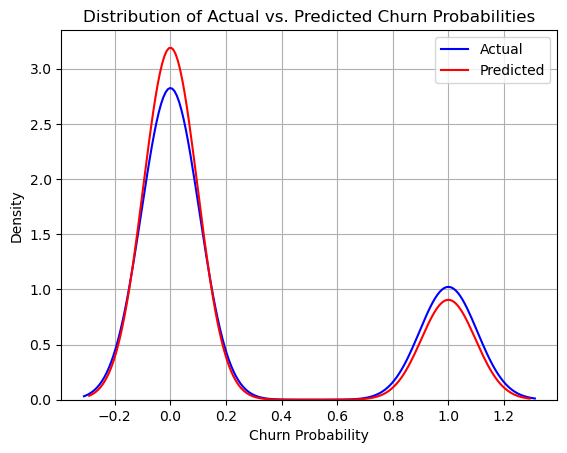

In [142]:
# Use kernel density estimation for smoother curves
sns.kdeplot(actual_values, label="Actual", color="b")
sns.kdeplot(predicted_values, label="Predicted", color="r")
plt.xlabel("Churn Probability")
plt.ylabel("Density")
plt.title("Distribution of Actual vs. Predicted Churn Probabilities")
plt.legend()
plt.grid(True)
plt.show()

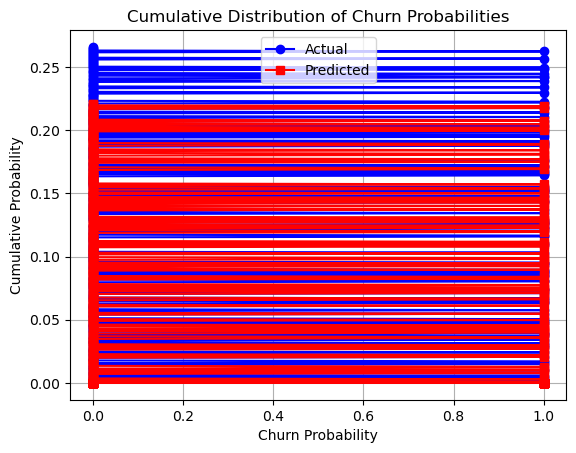

In [143]:
# Calculate and plot CDFs
actual_cdf = np.cumsum(np.sort(actual_values)) / len(actual_values)
predicted_cdf = np.cumsum(np.sort(predicted_values)) / len(predicted_values)
plt.plot(actual_values, actual_cdf, label="Actual", linestyle="-", marker="o", color="b")
plt.plot(predicted_values, predicted_cdf, label="Predicted", linestyle="-", marker="s", color="r")
plt.xlabel("Churn Probability")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution of Churn Probabilities")
plt.legend()
plt.grid(True)
plt.show()

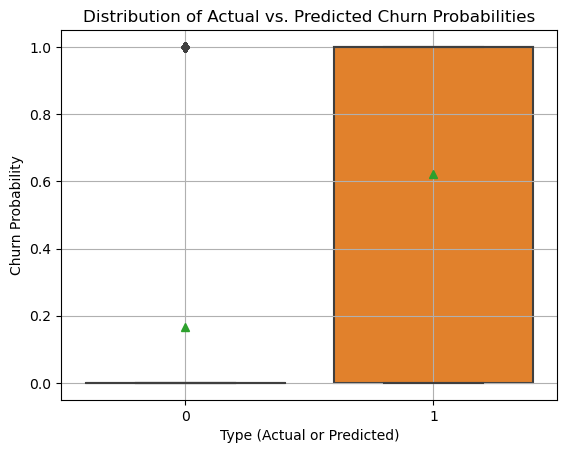

In [144]:
# Create and plot boxplot
sns.boxplot(
    x="type",
    y="value",
    showmeans=True,
    data=encoded_results_df.rename(columns={"Actual": "value", "Predicted": "type"}),
)
plt.xlabel("Type (Actual or Predicted)")
plt.ylabel("Churn Probability")
plt.title("Distribution of Actual vs. Predicted Churn Probabilities")
plt.grid(True)
plt.show()

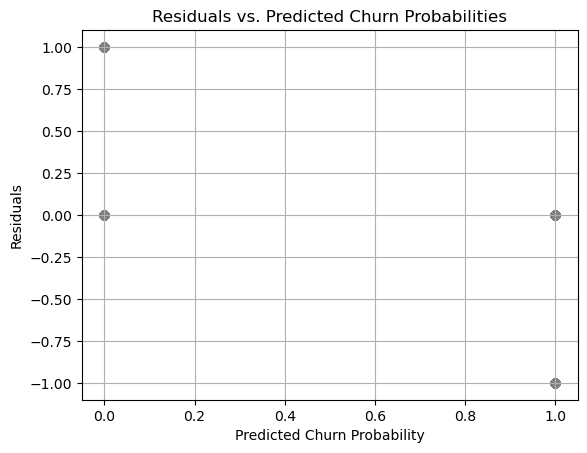

In [145]:
residuals = actual_values - predicted_values

# Plot residuals against predicted values or other features
plt.scatter(predicted_values, residuals, color="gray", alpha=0.5)
plt.xlabel("Predicted Churn Probability")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Churn Probabilities")
plt.grid(True)
plt.show()